# Integrantes - Caso 2

* Danny Diaz
* Daniel Ortega
* Ruben Tocain

# Descripción

Algoritmos:

1. **KMeans**: Para determinar el número óptimo de clusters usando el **método silhouette**.
2. **Clustering Jerárquico Aglomerativo**: Visualizaremos la estructura de los clusters a través de un **dendrograma**.

El dataset utilizado será el de **cáncer de mama** de Scikit-learn, el cual contiene características para clasificar tumores como benignos o malignos.

El objetivo es entrenar ambos modelos, comparar los resultados y encontrar el número óptimo de clusters.

# Imports

In [14]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

# Variables

In [ ]:
data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kmeans

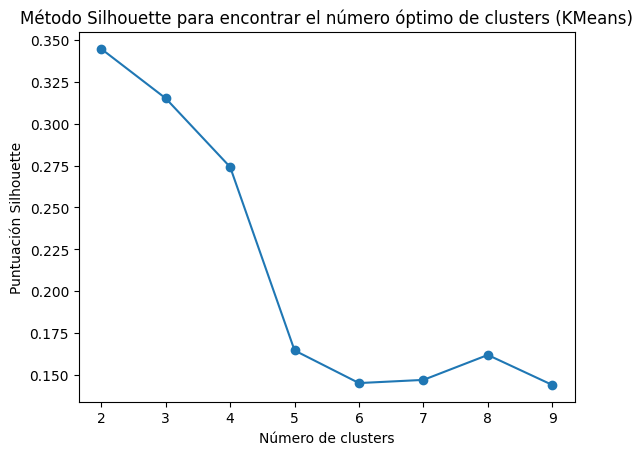

Número óptimo de clusters para KMeans: 2
Etiquetas del modelo KMeans: [0 0 0 0 0 0 0 0 0 0]


In [12]:
# Determinar el número óptimo de clusters con el método silhouette
silhouette_scores = []
range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    """
    Cercano a 1: Los puntos están bien asignados a sus clusters.
    Cercano a 0: Los puntos están en la frontera entre dos clusters.
    Cercano a -1: Los puntos están mal asignados (más cerca de un cluster diferente al asignado).
    """
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la puntuación de silhouette para diferentes números de clusters
plt.figure()
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Método Silhouette para encontrar el número óptimo de clusters (KMeans)')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación Silhouette')
plt.show()

# Entrenar KMeans con el número óptimo de clusters (el que tenga el mejor score)
best_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

print(f"Número óptimo de clusters para KMeans: {best_n_clusters}")
print(f"Etiquetas del modelo KMeans: {kmeans_labels[:10]}")  # Mostrando las primeras 10 etiquetas

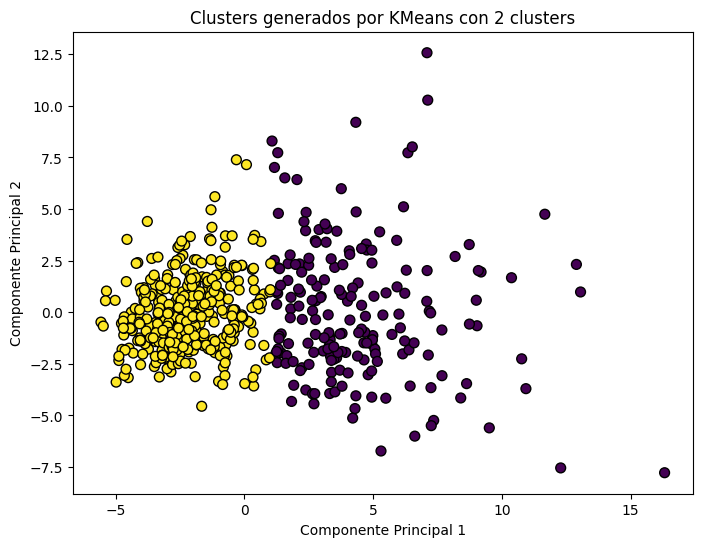

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Volver a entrenar el modelo KMeans con los datos reducidos (opcional, pero para mantener coherencia visual)
kmeans_pca = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_pca.fit(X_pca)
kmeans_pca_labels = kmeans_pca.labels_

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Clusters generados por KMeans con {best_n_clusters} clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Cluster Jerárquico Aglomerativo

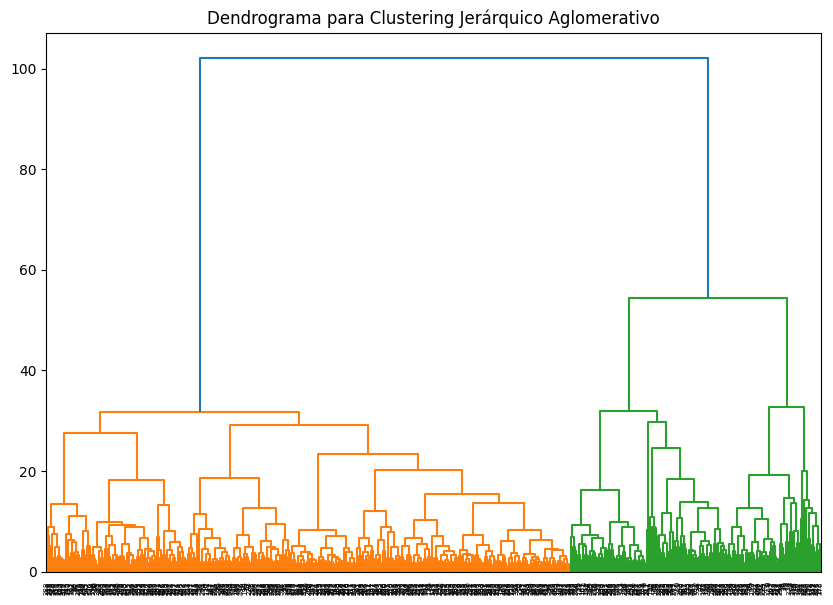

Etiquetas del modelo jerárquico: [0 0 0 0 0 0 0 0 0 0]


In [5]:
# Graficar el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma para Clustering Jerárquico Aglomerativo")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# Entrenar el modelo jerárquico con el número de clusters óptimo basado en el dendrograma
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, metric='euclidean', linkage='ward')
agg_clustering.fit(X_scaled)
agg_labels = agg_clustering.labels_

print(f"Etiquetas del modelo jerárquico: {agg_labels[:10]}")  # Mostrando las primeras 10 etiquetas

# Comparar los dos modelos

In [7]:
# Probar los modelos con nuevos datos
new_data = X_scaled[:10]  # Usando las primeras 5 filas de datos para las pruebas
new_kmeans_labels = kmeans.predict(new_data)
new_agg_labels = agg_clustering.fit_predict(new_data)

print(f"Predicciones de KMeans en nuevos datos: {new_kmeans_labels}")
print(f"Predicciones de Clustering Jerárquico en nuevos datos: {new_agg_labels}")

Predicciones de KMeans en nuevos datos: [0 0 0 0 0 0 0 0 0 0]
Predicciones de Clustering Jerárquico en nuevos datos: [0 0 0 1 0 0 0 0 0 1]


In [9]:
# Calcular cuántos resultados coincidieron
matches = sum(new_kmeans_labels == new_agg_labels)

# Calcular el porcentaje de coincidencias
total_samples = len(new_kmeans_labels)
match_percentage = (matches / total_samples) * 100

# Imprimir el porcentaje de coincidencias
print(f"Porcentaje de coincidencias entre KMeans y Clustering Jerárquico: {match_percentage:.2f}%")

Porcentaje de coincidencias entre KMeans y Clustering Jerárquico: 80.00%


# Fin